##Importing Libraries

In [3]:
%pip install scikeras[tensorflow]
%pip install scikeras[tensorflow] pandas scikit-learn matplotlib tensorflow
%pip install --upgrade tensorflow
import keras
%pip3 install keras


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'tensorflow.python.trackable'

##Importing Dataset and Splitting

In [ ]:
# Load dataset
file_path = 'drag_coef.csv'
data = pd.read_csv(file_path)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Applying BPFNN and GridsearchCV for Optimization

In [ ]:
# Define the BPFNN model
def create_model(optimizer='adam', neurons=5):
    model = Sequential()
    # Specify the input shape in the first layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Wrap the model using KerasRegressor
model = KerasRegressor(model=create_model, verbose=0,neurons=5)

# Define the grid search parameters
param_grid = {
    'batch_size': [10, 20],
    'epochs': [50, 100],
    'optimizer': ['SGD', 'Adam'],
    'neurons': [5, 10]
}

# Perform GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,n_jobs=-1)
grid_result = grid.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Tuning the Hyperparameters

In [ ]:
# Print the best parameters and best score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Train the model using the best parameters
best_model = grid_result.best_estimator_.model_
best_model.compile(loss='mean_squared_error', optimizer=grid_result.best_params_['optimizer'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=0)

Best: 0.020839630388728898 using {'batch_size': 10, 'epochs': 100, 'neurons': 10, 'optimizer': 'Adam'}


##Predictions on the Test set

In [ ]:
# Predict using the test set
import numpy as np
y_pred = best_model.predict(X_test)
y_pred_train=best_model.predict(X_train)
np.set_printoptions(precision=3)
print(y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[ -8.829]
 [ 86.671]
 [ 85.654]
 [  6.574]
 [ 90.323]
 [ 87.   ]
 [ 98.391]
 [ 88.432]
 [109.327]
 [ 85.565]
 [ 76.066]
 [ 98.301]
 [109.151]
 [ 80.416]
 [ 86.15 ]
 [ 80.049]
 [ 75.955]
 [109.902]
 [ 75.185]
 [  4.237]
 [ 60.404]
 [ 95.042]
 [ 80.454]
 [ 86.679]
 [ 80.383]
 [ 93.565]
 [ 87.809]
 [ 37.93 ]
 [102.665]
 [ 82.626]
 [ 80.371]
 [102.827]
 [ 98.898]
 [ 95.273]
 [ 83.798]
 [  2.416]
 [ 65.882]
 [ 81.515]
 [ 94.859]
 [ 95.254]
 [ 23.792]
 [ 99.063]
 [ 85.114]
 [ 48.007]
 [ 77.94 ]
 [ 95.121]
 [ 91.937]
 [ 79.873]
 [ 41.149]
 [ 84.91 ]
 [ 85.498]
 [ 76.321]
 [ 82.467]
 [110.226]
 [ 14.077]
 [  9.112]
 [ 84.285]
 [ 44.83 ]
 [  0.84 ]
 [ 82.551]
 [ 60.652]
 [ 73.864]
 [ 81.821]
 [ 88.429]
 [ 82.072]
 [ 80.274]
 [ 89.944]
 [ 87.613]
 [ 71.322]
 [ 76.884]
 [ 91.292]
 [ 95.272]
 [107.152]
 [ 80.286]
 [ 94.752]
 [ 77.727]
 [ 80.489]
 [ 71.456]
 [ 85.3  ]
 [ 86.005]
 [ 88.549]
 [ 11.169]
 [-10.975]
 [ 80.249]

##Model Evaluation

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train,y_pred_train)
r2_train = r2_score(y_train,y_pred_train)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print("R2 Train:",r2_train)
print("MSE Train:", mse_train)

Mean Squared Error: 89442.81856305864
R2 Score: 0.013524188180574992
R2 Train: 0.03273526048473152
MSE Train: 37708.93668997624


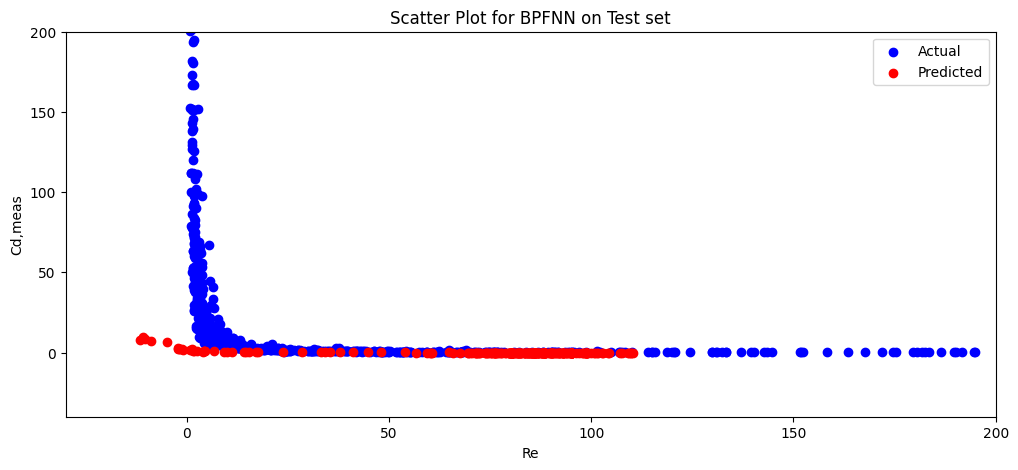

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  , label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red', label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 200)
plt.title('Scatter Plot for BPFNN on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [ ]:
r2_fit = r2_score(y_pred ,X_test[:,-1])
print(r2_fit)

-6.505231863516917


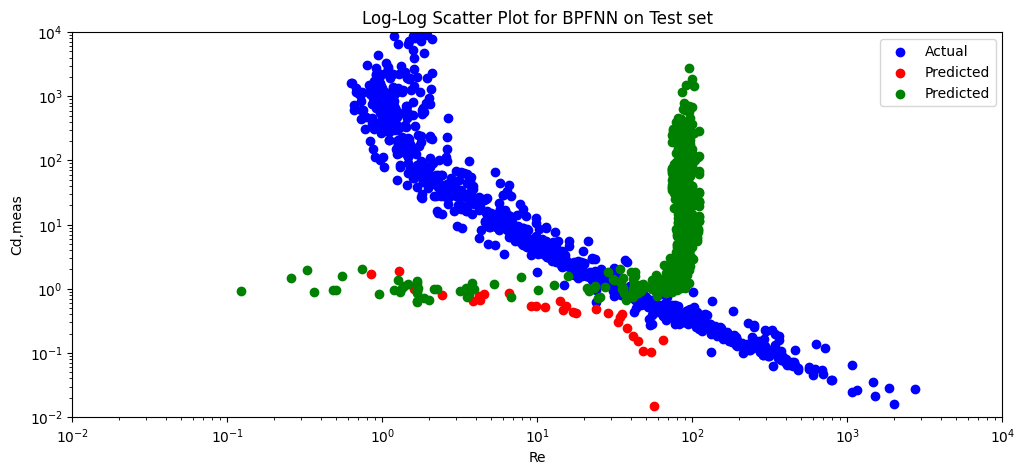

In [ ]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:, -1], c='blue', label='Actual')
plt.scatter(y_pred, X_test[:, -1], c='red', label='Predicted')
plt.scatter(y_pred_train,y_train, color='green', label='Predicted')

plt.xscale('log')
plt.yscale('log')

plt.ylim(0.01, 10000)
plt.xlim(0.01, 10000)

plt.title('Log-Log Scatter Plot for BPFNN')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

plt.show()

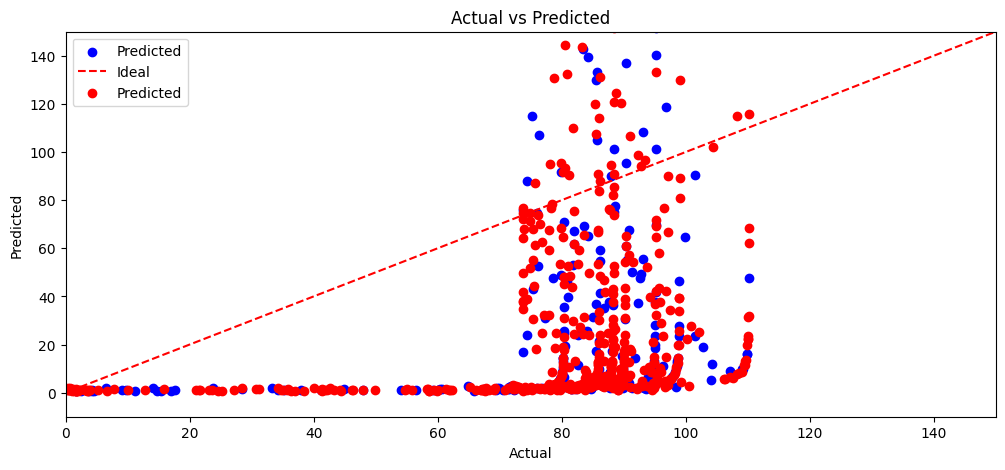

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(0, 150)
plt.ylim(-10, 150)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

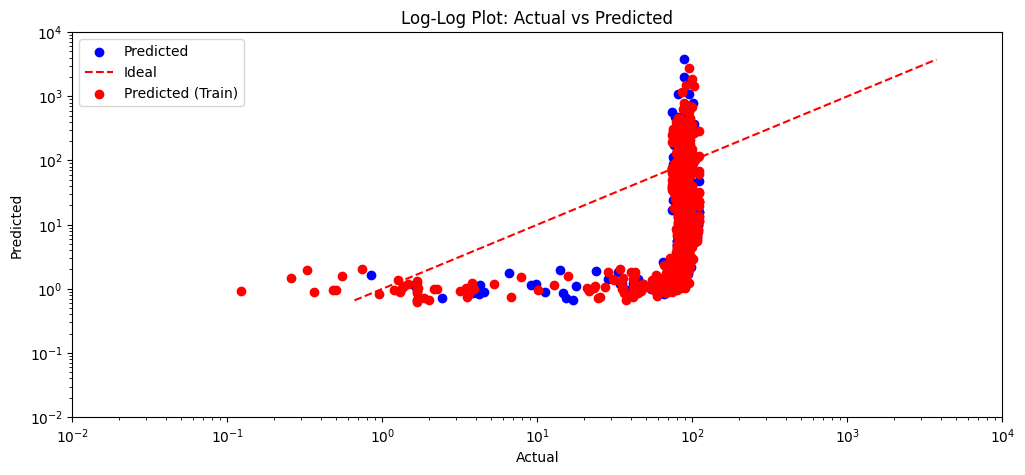

In [ ]:
plt.figure(figsize=(12, 5))

plt.scatter(y_pred, y_test, color='blue',label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train, y_train, color='red', label='Predicted (Train)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(0.01, 10000)
plt.ylim(0.01, 10000)

plt.title('Log-Log Plot: Actual vs Predicted')
plt.legend()

plt.show()

#Scatter Plot of Results

##Loss Functiion vs Epochs

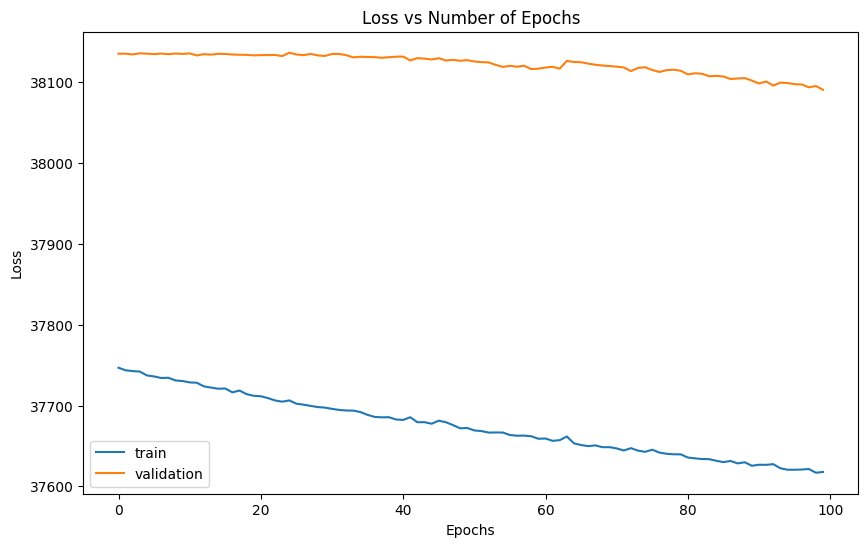

In [ ]:
# Plot the loss vs number of epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Number of Epochs')

plt.show()

##Scatter Plot of Test set

<Figure size 1600x800 with 0 Axes>

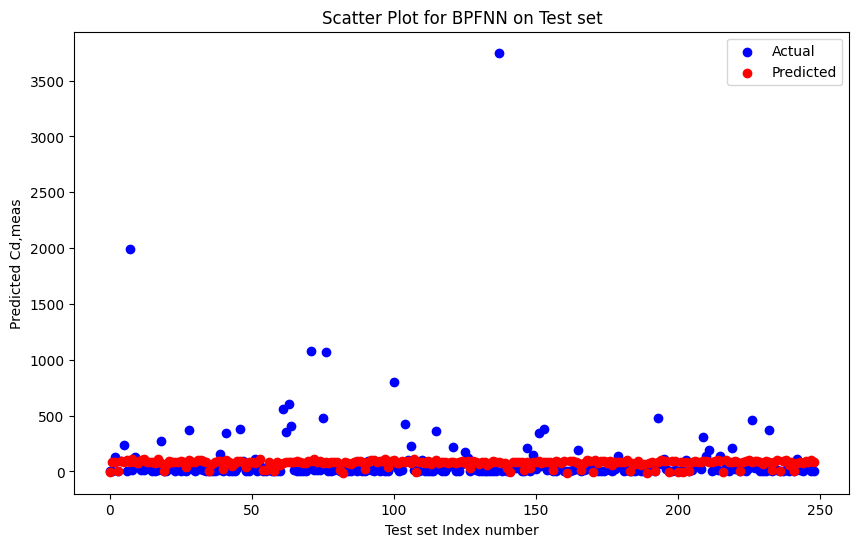

In [ ]:
plt.figure(figsize=(16, 8))

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test , c = 'blue'  ,label = 'Actual')
plt.scatter(range(len(y_pred)), y_pred , c = 'red' ,label = 'Predicted')
plt.title('Scatter Plot for BPFNN on Test set')
plt.xlabel('Test set Index number')
plt.ylabel('Predicted Cd,meas')
plt.legend()

##Scatter Plot on Training set

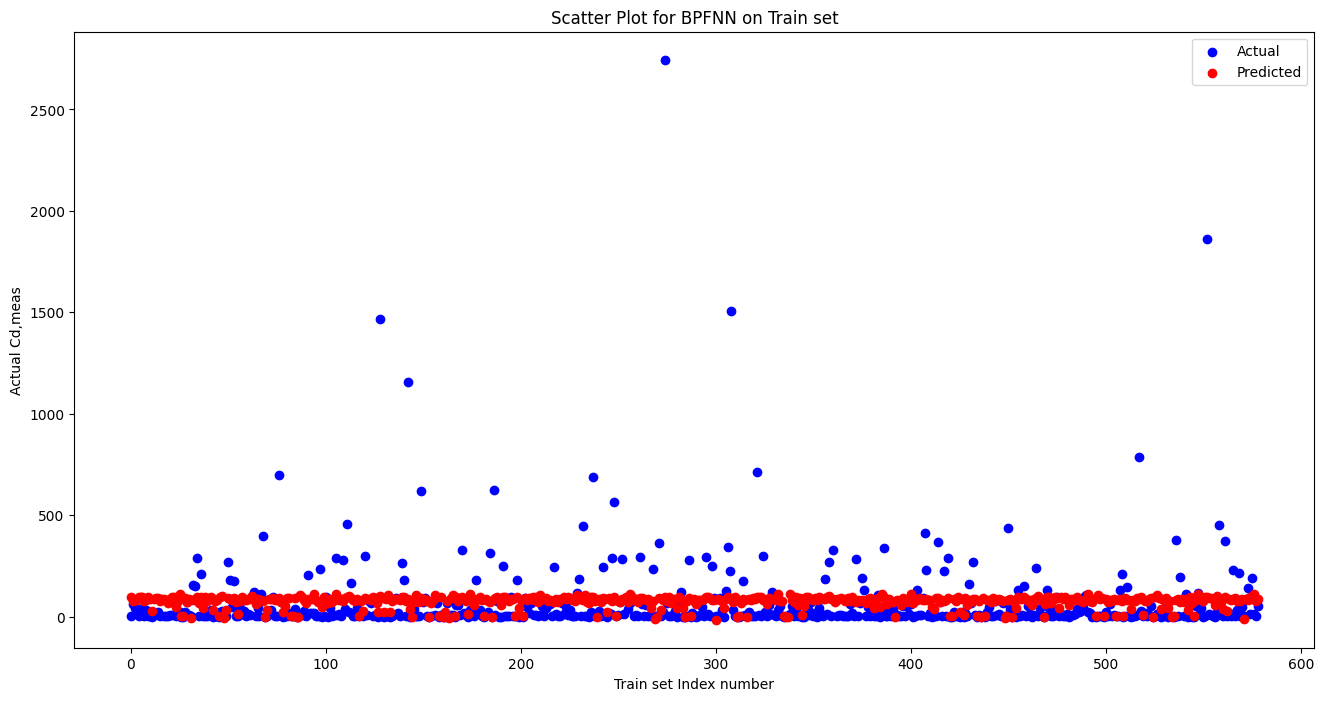

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(y_train)), y_train , c = 'blue'  , label = 'Actual')
plt.scatter(range(len(y_pred_train)), y_pred_train , c = 'red' , label = 'Predicted')
plt.title('Scatter Plot for BPFNN on Train set')
plt.ylabel('Actual Cd,meas')
plt.xlabel('Train set Index number')
plt.legend()
plt.show()

